`seaborn.regplot` 和 `seaborn.lmplot` 都是 Seaborn 中用于绘制 **回归分析** 的函数，但它们在使用方式、功能和灵活性上有一些关键区别。  

### **核心区别对比**
| 特性 | `sns.regplot()` | `sns.lmplot()` |
|------|---------------|---------------|
| **输入数据** | 接受 `x`、`y` 直接传入数组或 DataFrame 列 | **必须使用 `data=` 参数**（DataFrame 格式） |
| **图形级别** | **Axes-level**（返回 `matplotlib.axes.Axes`） | **Figure-level**（返回 `FacetGrid`，可多子图） |
| **多分组回归** | 不支持 | 支持 `hue`、`col`、`row` 分组绘制 |
| **回归类型** | 支持线性、多项式、局部加权回归（`lowess`） | 同样支持，但额外支持分面回归 |
| **置信区间** | 默认显示 95% 置信区间 | 同样支持，但可分组控制 |
| **适用场景** | 简单回归分析 | 复杂回归分析（多组别、多子图） |

### **主要功能对比**
#### **`sns.regplot()`**
- **适用于**：单组数据的回归分析（简单散点图 + 回归线）。
- **返回对象**：`matplotlib.axes.Axes`，可以直接用 `plt` 方法调整。
- **关键参数**
  - `order=1`（默认线性回归，`order=2` 可拟合二次曲线）
  - `ci=95`（置信区间，设为 `None` 可隐藏）
  - `robust=True`（使用稳健回归，抗异常值）

#### **`sns.lmplot()`**
- **适用于**：
  - 分组回归（如按性别、类别分别拟合回归线）。
  - 多子图回归（如按不同 `col` 或 `row` 分面绘制）。
- **返回对象**：`FacetGrid`，可以进一步调整布局。
- **关键参数**
  - `hue="category"`（按类别分组回归）
  - `col="category"`（按列分面绘制）
  - `row="category"`（按行分面绘制）
  - `lowess=True`（使用局部加权回归，非线性拟合）

### **如何选择？**
| 场景 | 推荐函数 |
|------|---------|
| **简单回归分析**（单组数据） | `sns.regplot()` |
| **分组回归**（如男女分别拟合） | `sns.lmplot(hue="gender")` |
| **多子图回归**（如不同年份对比） | `sns.lmplot(col="year")` |
| **需要精细控制图形**（如调整 `Axes`） | `sns.regplot()`（更接近 `matplotlib`） |
| **需要高阶回归**（如多项式、稳健回归） | 两者均可 |

### **总结**
- **`regplot`** 更轻量，适合简单回归分析，返回 `Axes` 对象，适合与其他 `matplotlib` 图形结合。
- **`lmplot`** 更强大，支持分组、分面回归，返回 `FacetGrid`，适合复杂数据探索。

如果你只需要画 **一个回归图**，用 `regplot`；如果你需要 **分组、分面回归**，用 `lmplot`。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
28,5.2,3.4,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
65,6.7,3.1,4.4,1.4,versicolor
102,7.1,3.0,5.9,2.1,virginica
116,6.5,3.0,5.5,1.8,virginica
36,5.5,3.5,1.3,0.2,setosa
129,7.2,3.0,5.8,1.6,virginica
110,6.5,3.2,5.1,2.0,virginica
142,5.8,2.7,5.1,1.9,virginica


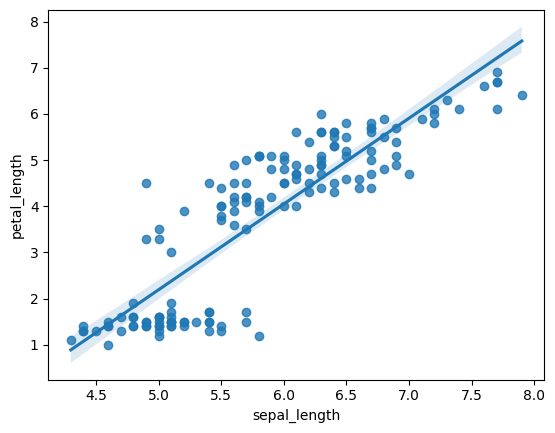

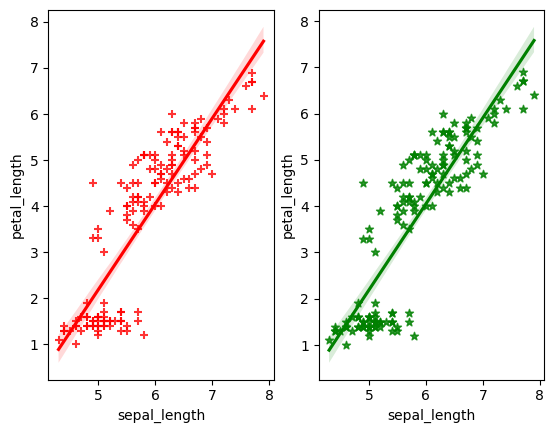

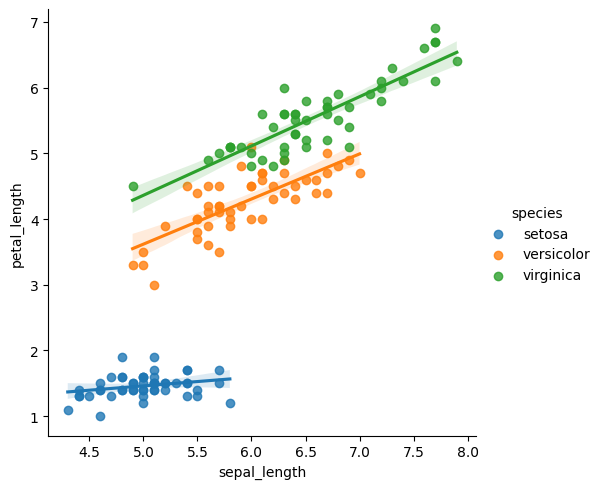

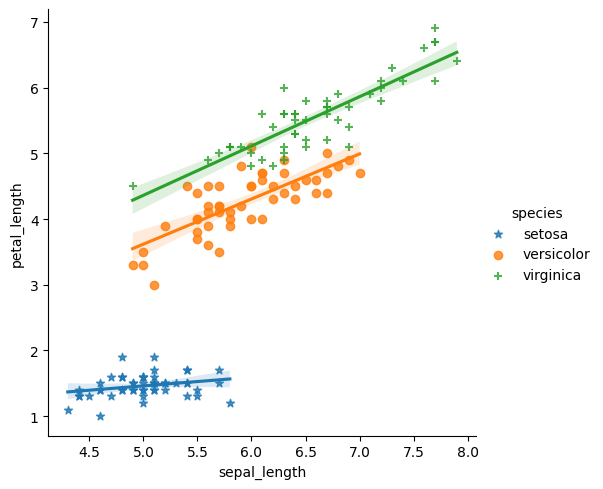

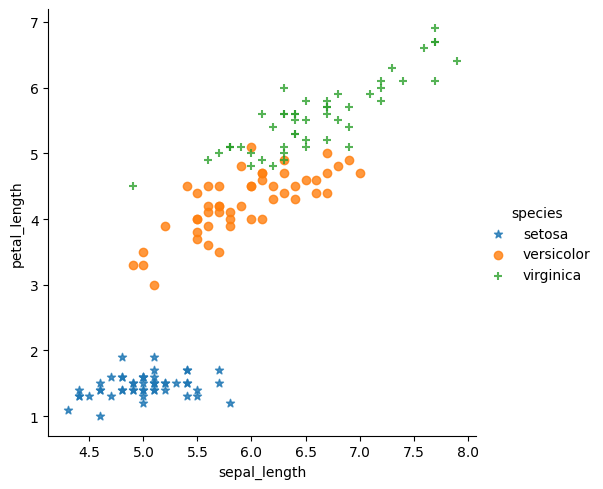

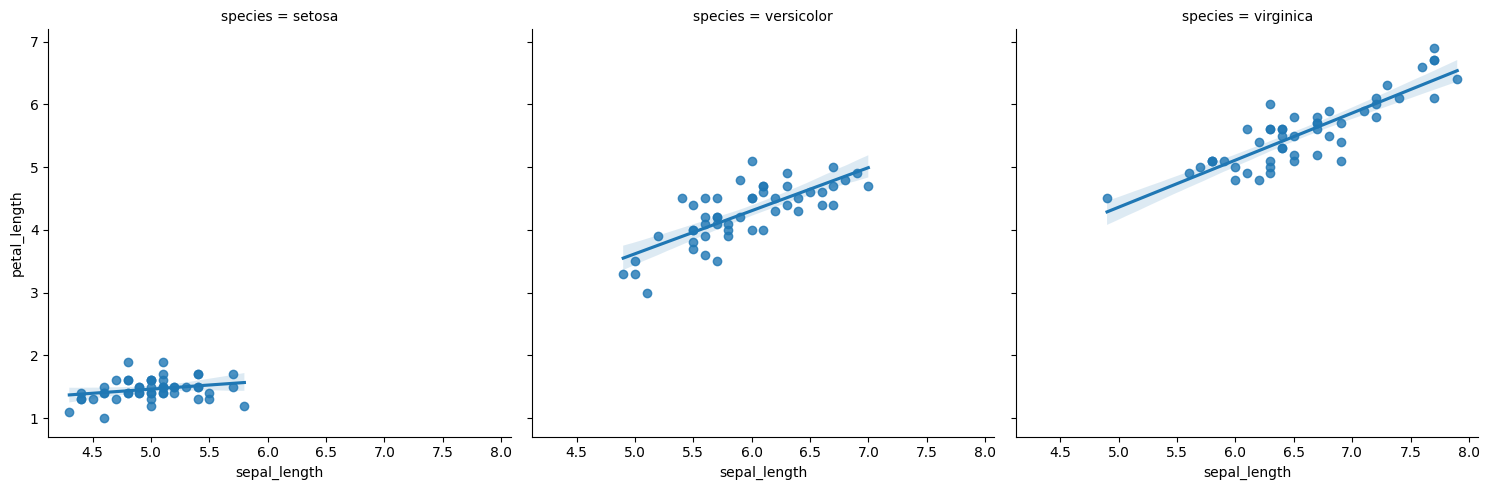

In [ ]:
iris = pd.read_csv("seaborn-data/iris.csv")
display(iris.sample(10))

# 图中的点表示实际的数据点，Seaborn 根据这些数据拟合出直线，表示x轴和y轴对应字段之间的线性关系，直线周围的阴影表示置信区间。
# 关于置信区间，可以通过设置'ci'参数控制是否显示。
# sns.regplot(x='sepal_length',y='petal_length',data=iris,ci=None)
sns.regplot(x='sepal_length',y='petal_length',data=iris)

# 可以通过'color'和'marker'参数来控制图形的颜色以及数据点的形状。
fig,axes=plt.subplots(1,2)
sns.regplot(x='sepal_length',y='petal_length',data=iris, color='r',marker='+',ax=axes[0])
sns.regplot(x='sepal_length',y='petal_length',data=iris, color='g',marker='*',ax=axes[1])

# lmplot() 可以设置hue，进行多个类别的显示，而 regplot() 是不支持的。这里我们通过设置hue='species'，来进行分类别地展示。
sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=iris)

# 同样的，我们也可以更改数据点的形状，来进行区分。
sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=iris, markers=['*','o','+'])

# 设置'fit_reg'参数，可以控制是否显示拟合的直线。
sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=iris, markers=['*','o','+'], fit_reg=False)

# 如果要对不同的类别分开绘制，用'col'参数代替'hue'。
sns.lmplot(x='sepal_length', y='petal_length', col='species', data=iris)

这段代码使用了 **Seaborn** 和 **Pandas** 来分析和可视化汽车数据集 `mpg.csv`，主要包含两个图表：
1. **分类散点图（`sns.catplot`）**：展示不同气缸数（`cylinders`）下的加速度（`acceleration`），并用颜色表示车重（`weight`）。
2. **二次多项式回归线（`sns.regplot`）**：拟合 `cylinders` 和 `acceleration` 之间的非线性关系。

**`mpg.csv`**：Seaborn 内置的汽车数据集，包含：
- `cylinders`（气缸数，如 4、6、8）
- `acceleration`（加速度，单位：秒）
- `weight`（车重，单位：磅）
- 其他字段：`mpg`（油耗）、`horsepower`（马力）等。

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
39,14.0,8,400.0,175.0,4464,11.5,71,usa,pontiac catalina brougham
78,21.0,4,120.0,87.0,2979,19.5,72,europe,peugeot 504 (sw)
338,27.2,4,135.0,84.0,2490,15.7,81,usa,plymouth reliant
230,15.5,8,350.0,170.0,4165,11.4,77,usa,chevrolet monte carlo landau
132,25.0,4,140.0,75.0,2542,17.0,74,usa,chevrolet vega
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
206,26.5,4,140.0,72.0,2565,13.6,76,usa,ford pinto
176,19.0,6,232.0,90.0,3211,17.0,75,usa,amc pacer


<Axes: xlabel='cylinders', ylabel='acceleration'>

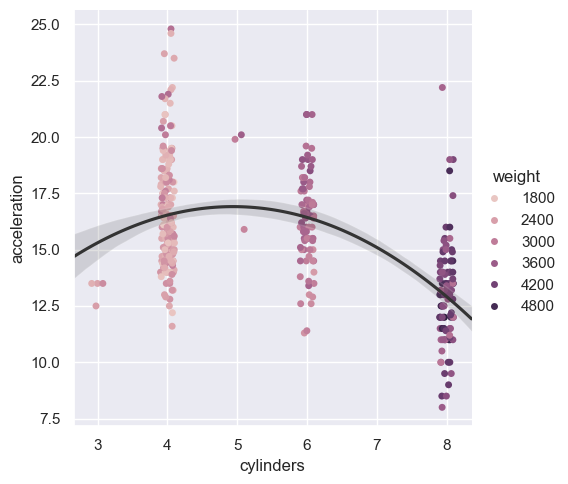

In [3]:
sns.set_theme()
mpg = pd.read_csv("seaborn-data/mpg.csv")
display(mpg.sample(10))

# 绘制分类散点图，展示不同气缸数下的加速度分布，并用颜色深浅表示车重。
sns.catplot(
    data=mpg, 
    x="cylinders",       # X轴：气缸数（分类变量）
    y="acceleration",    # Y轴：加速度（数值变量）
    hue="weight",        # 颜色映射：车重（数值变量）
    native_scale=True,   # 使用原始刻度（不自动优化分类间距）
    zorder=1             # 设置图层顺序（避免回归线被散点遮挡）
)

# 在 catplot 基础上叠加一条 二次多项式回归线，拟合 cylinders 和 acceleration 的关系。
sns.regplot(
    data=mpg, 
    x="cylinders", 
    y="acceleration",
    scatter=False,      # 不显示散点（避免与 catplot 重复）
    truncate=False,     # 不截断回归线到数据范围,让回归线延伸到绘图边界（默认会截断到数据范围）
    order=2,            # 二次多项式回归（非线性拟合）
    color=".2"          # 回归线颜色（灰色）,灰色（Seaborn 的灰度缩写，0 是黑，1 是白）。
)

,dataset,x,y
33,IV,8.0,6.58
7,I,4.0,4.26
41,IV,8.0,5.56
15,II,11.0,9.26
23,III,8.0,6.77
8,I,12.0,10.84
38,IV,8.0,7.04
25,III,9.0,7.11
18,II,4.0,3.10
39,IV,8.0,5.25


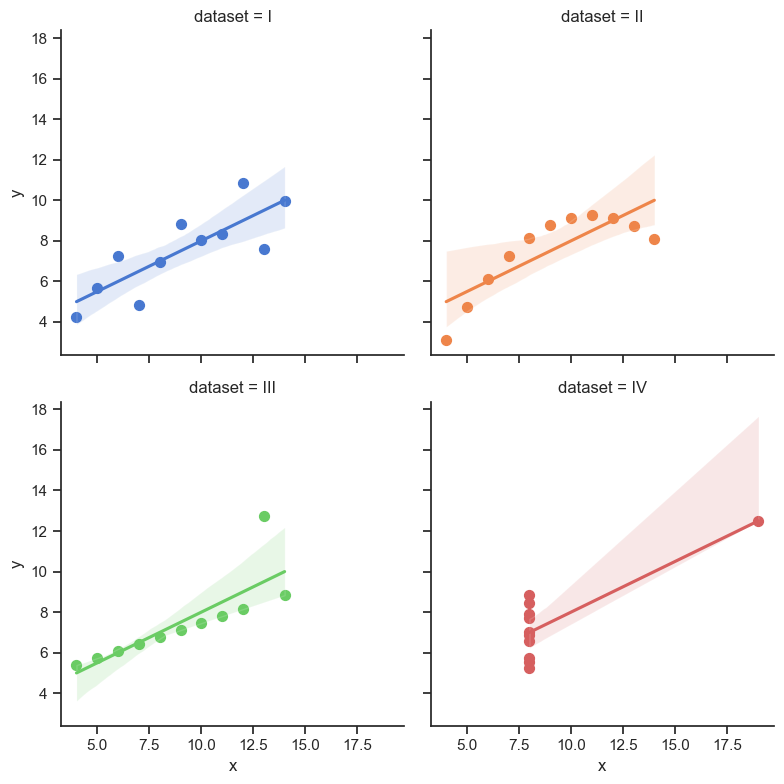

In [4]:
# Load the example dataset for Anscombe's quartet
df = pd.read_csv("seaborn-data/anscombe.csv")
display(df.sample(10))

sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df,           # 数据源（DataFrame）
    x="x",             # x轴变量名（列名）
    y="y",             # y轴变量名（列名）
    col="dataset",     # 分面变量：按此列的值拆分多个子图（列方向）
    hue="dataset",     # 颜色分组变量：按此列的值分配不同颜色
    col_wrap=2,        # 每行显示的子图数量（此处每行2个）
    palette="muted",   # 颜色调色板（柔和色调）
    ci=95,             # 关闭回归线的置信区间阴影
    height=4,          # 每个子图的高度（英寸）
    scatter_kws={"s": 50, "alpha": 1}  # 散点图参数：点大小=50，透明度=1
)

这段代码使用了 **Seaborn** 库来可视化泰坦尼克号数据集（`titanic`），重点分析不同性别（`sex`）乘客的年龄（`age`）与生存率（`survived`）之间的关系。以下是逐步解析：


**数据来源**：Seaborn 内置的泰坦尼克号数据集，包含乘客信息（如年龄、性别、是否幸存等）。
关键字段：
- `age`：乘客年龄（连续变量）。
- `sex`：性别（分类变量，`male`/`female`）。
- `survived`：是否幸存（二分类变量，`0`=死亡，`1`=幸存）。

**定义颜色调色板**
```python
pal = dict(male="#6495ED", female="#F08080")
```
**作用**：自定义性别对应的颜色：
- 男性（`male`）：蓝色（`#6495ED`）。
- 女性（`female`）：粉色（`#F08080`）。
**用途**：后续通过 `palette=pal` 传递给绘图函数，统一颜色映射。

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
210,0,3,male,24.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
546,1,2,female,19.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
236,0,2,male,44.0,1,0,26.0000,S,Second,man,True,NaN,Southampton,no,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
497,0,3,male,NaN,0,0,15.1000,S,Third,man,True,NaN,Southampton,no,True
677,1,3,female,18.0,0,0,9.8417,S,Third,woman,False,NaN,Southampton,yes,True
139,0,1,male,24.0,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True


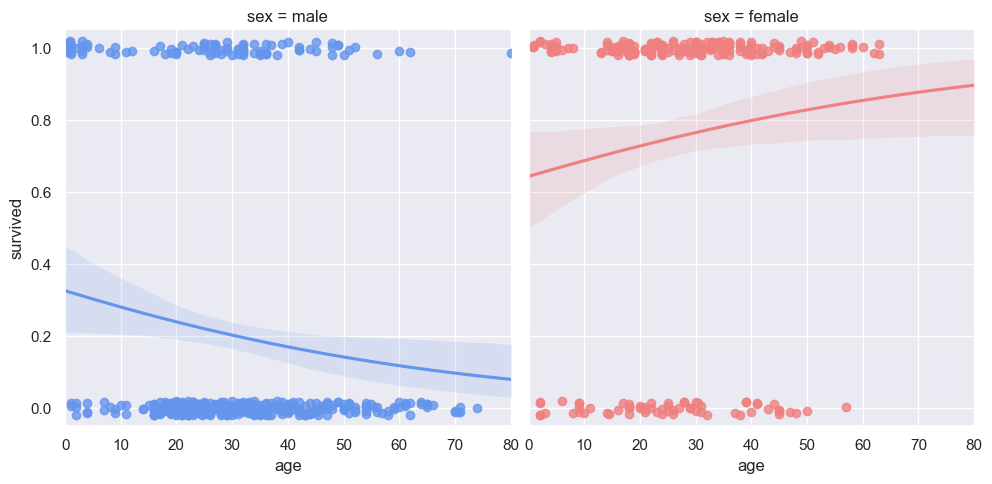

In [7]:
sns.set_theme(style="darkgrid")
titanic = pd.read_csv("seaborn-data/titanic.csv")
display(titanic.sample(10))

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(
    x="age",               # X轴：年龄
    y="survived",          # Y轴：是否幸存（二分类）
    col="sex",             # 按性别分列绘制
    hue="sex",             # 按性别分组颜色
    data=titanic,          # 数据源
    palette=pal,           # 使用自定义颜色
    y_jitter=.02,          # 对 y 值添加轻微随机抖动（避免所有点重叠在 y=0 或 y=1 上）。
    logistic=True,         # 拟合 逻辑回归曲线（默认是线性回归），适用于 y 是二分类变量（0/1）。
    truncate=False         # 回归线延伸至绘图边界（默认会截断到数据范围）。
)

g.set(xlim=(0, 80),     # 年龄范围 0~80 岁
      ylim=(-.05, 1.05) # 生存概率范围 -0.05~1.05（稍微扩展以显示边界点）。
     )

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
691,1,3,female,4.0,0,1,13.4167,C,Third,child,False,NaN,Cherbourg,yes,False
555,0,1,male,62.0,0,0,26.5500,S,First,man,True,NaN,Southampton,no,True
629,0,3,male,NaN,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True
584,0,3,male,NaN,0,0,8.7125,C,Third,man,True,NaN,Cherbourg,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
374,0,3,female,3.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
454,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
181,0,2,male,NaN,0,0,15.0500,C,Second,man,True,NaN,Cherbourg,no,True
169,0,3,male,28.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,no,True
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False


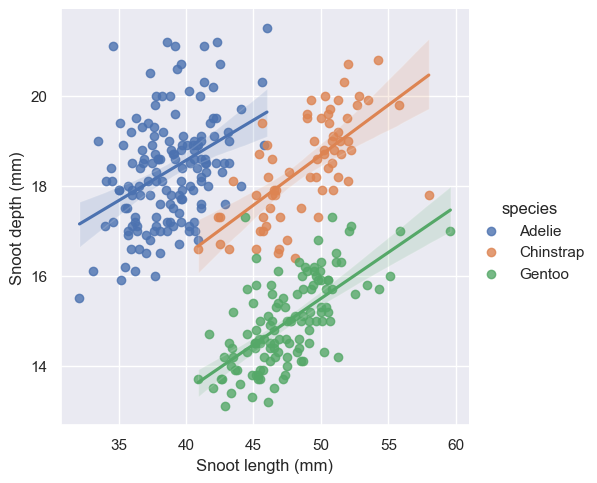

In [ ]:
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

# **`sns.residplot()` 函数详解**

`seaborn.residplot()` 是 **Seaborn** 库中用于绘制线性回归残差图的函数，主要用于 **回归诊断**，帮助检查线性回归模型的拟合情况。它直观地展示了 **观测值与模型预测值之间的差异（残差）**，从而判断模型是否存在问题（如非线性关系、异方差性等）。

## **1. 函数语法**
```python
seaborn.residplot(
    x,                  # 自变量（特征）
    y,                  # 因变量（目标）
    data=None,          # 数据框（DataFrame），可选
    lowess=False,       # 是否绘制 LOWESS 平滑线
    order=1,            # 回归模型阶数（多项式回归）
    robust=False,       # 是否使用稳健回归（抗异常值）
    dropna=True,        # 是否自动删除缺失值
    label=None,         # 图例标签
    color=None,         # 残差点的颜色
    scatter_kws=None,   # 散点图参数（传递给 plt.scatter）
    line_kws=None,      # 平滑线参数（传递给 plt.plot）
    ax=None             # 指定绘图的 Axes 对象
)
```

## **2. 核心功能**
### **(1) 计算残差**
- 首先，`residplot()` 会拟合一个 **线性回归模型**（默认 `order=1` 即简单线性回归）：
  $$
  y = \beta_0 + \beta_1 x + \epsilon
  $$
- 然后计算 **残差（residuals）**：
  $$
  \text{residual} = y - \hat{y} = y - (\beta_0 + \beta_1 x)
  $$
- 最后绘制 **残差 vs 自变量（x）** 的散点图。

### **(2) 可选 LOWESS 平滑线**
- 如果 `lowess=True`，会额外计算并绘制一条 **非参数平滑曲线（LOWESS）**，用于观察残差的趋势：
  - 如果平滑线 **接近水平**，说明残差随机分布，线性模型合理。
  - 如果平滑线 **有明显趋势（如弯曲或倾斜）**，说明可能存在 **非线性关系** 或 **异方差性**。

## **3. 参数详解**
### **(1) 主要参数**
| 参数 | 说明 |
|------|------|
| `x` | 自变量（特征变量） |
| `y` | 因变量（目标变量） |
| `data` | 如果 `x` 和 `y` 是 DataFrame 的列名，可以传入 `data=df` |
| `lowess` | `True` 时绘制 LOWESS 平滑线（默认 `False`） |
| `order` | 回归模型阶数（`1`=线性，`2`=二次多项式回归等） |
| `robust` | `True` 时使用稳健回归（减少异常值影响） |
| `color` | 残差点的颜色（如 `"g"`=绿色，`"b"`=蓝色） |

### **(2) 图形美化参数**
| 参数 | 说明 |
|------|------|
| `scatter_kws` | 传递给 `plt.scatter()` 的参数（如 `s=50` 调整点大小） |
| `line_kws` | 传递给 LOWESS 平滑线的参数（如 `lw=2` 调整线宽） |
| `label` | 图例标签 |
| `ax` | 指定绘图的 `matplotlib.axes.Axes` 对象 |

## **4. 典型使用场景**
### **(1) 检查线性关系**
如果残差 **随机分布在 0 附近**，说明线性模型合适：

### **(2) 检测非线性模式**
如果残差 **呈现曲线趋势**，说明可能存在 **非线性关系**，可尝试多项式回归：

### **(3) 检测异方差性**
如果残差的 **离散程度随 `x` 变化**（如漏斗形），说明存在 **异方差性（Heteroscedasticity）**，可能需要 **数据变换** 或 **加权回归**：

## **5. 示例代码**
```python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置风格
sns.set_theme(style="whitegrid")

# 生成模拟数据
np.random.seed(42)
x = np.random.normal(2, 1, 100)
y = 2 + 1.5 * x + np.random.normal(0, 2, 100)

# 绘制残差图
plt.figure(figsize=(8, 5))
sns.residplot(x=x, y=y, lowess=True, color="g", 
              scatter_kws={"s": 50, "alpha": 0.6},
              line_kws={"lw": 2, "color": "red"})
plt.title("Residual Plot with LOWESS Smoothing")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()
```

## **6. 如何解读残差图？**
| 残差图特征 | 可能的问题 | 解决方案 |
|------------|------------|----------|
| 随机分布在 0 附近 | 模型拟合良好 | 无需调整 |
| 呈现曲线趋势 | 非线性关系 | 尝试多项式回归或非线性模型 |
| 离散程度随 `x` 增大 | 异方差性 | 数据变换（如 log(y)）或稳健回归 |
| 存在明显离群点 | 异常值影响 | 检查数据或使用稳健回归 |

## **7. 总结**
- `sns.residplot()` 主要用于 **回归诊断**，帮助判断线性回归是否合适。
- **关键参数**：
  - `lowess=True` 可显示残差的趋势。
  - `order=2` 可尝试多项式回归。
  - `robust=True` 可减少异常值影响。
- **典型用途**：
  - 检查 **线性关系**。
  - 检测 **非线性模式** 或 **异方差性**。

通过观察残差图，可以更科学地改进回归模型！ 🚀

这段代码使用了Python中的numpy和seaborn库来生成一个模拟数据集，并绘制线性回归的残差图。

<Axes: >

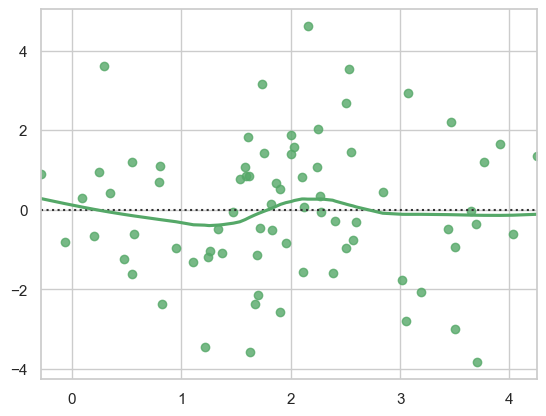

In [ ]:
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# 用于绘制线性回归模型的残差图。残差是观测值（y）与模型预测值之间的差异。
# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y,
              lowess=True,  # 使用局部加权散点平滑（Locally Weighted Scatterplot Smoothing）来拟合残差的趋势线。这有助于直观判断残差是否存在非线性模式或异方差性。
              color="g")